# GOOGLE PLAYSTORE ANALYSIS

The dataset used in this analysis is taken from [kaggle datasets](https://www.kaggle.com/datasets)

In this analysis we took a raw data which is in csv format and then converted it into a dataframe.Performed some operations, cleaning of the data and finally visualizing some necessary conclusions obtained from it.

Let's import necessary libraries required for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Convert the csv file into dataframe using pandas

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


This is the data we obtained from the csv file.Let's see some info about this dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


This dataframe consists of 10841 entries ie information about 10841 apps.
It tells about the category to which the app belongs,rating given by the users,size of the app,number of reviews given,count of number of installs and some other information

# DATA CLEANING

Some columns have in-appropriate data,data types.This columns needed to be cleaned to perform the analysis.

##### SIZE : 

This column has in-appropriate data type.This needed to be converted into numeric type after converting every value into MB's


For example, the size of the app is in “string” format. We need to convert it into a numeric value. If the size is “10M”, then ‘M’ was removed to get the numeric value of ‘10’. If the size is “512k”, which depicts app size in kilobytes, the first ‘k’ should be removed and the size should be converted to an equivalent of ‘megabytes’.

In [5]:
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

10472 has in-appropriate data in every column, may due to entry mistake.So we are removing that entry from the table

In [6]:
df.drop(10472,inplace=True)

By using pd.to_numeric command we are converting into numeric type

In [7]:
df['Size']=df['Size'].apply(pd.to_numeric)

##### Installs :

The value of installs is in “string” format. It contains numeric values with commas. It should be removed. And also, the ‘+’ sign should be removed from the end of each string.

In [8]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))

By using pd.to_numeric command we are converting it into numeric data type

In [9]:
df['Installs']=df['Installs'].apply(pd.to_numeric)

##### Reviews :
The reviews column is in string format and we need to convert it into numeric type

In [10]:
df['Reviews']=df['Reviews'].apply(pd.to_numeric)

After cleaning some columns and rows we obtained the required format to perform the analysis

In [11]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# DATA VISUALIZATION

In this we are taking a parameter as reference and checking the trend of another parameter like whether there is a rise or fall,which category are more,what kinds are of more intrest and so on.

###### Basic pie chart to view distribution of apps across various categories

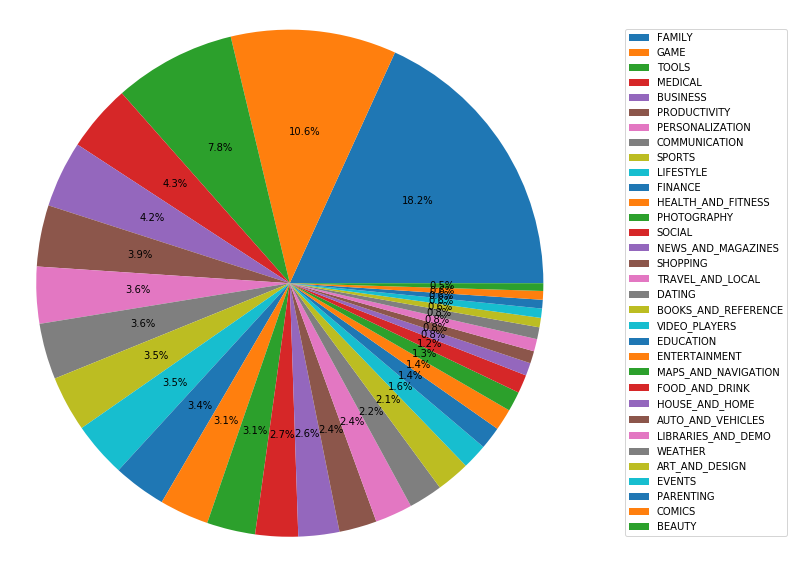

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

## App count for certain range of Ratings

In this we are finding the count of apps for each range from 0 to 5 ie how many apps have more rating,how many are less rated.

In [40]:
bins=pd.cut(df['Rating'],[0.0,1.0,2.0,3.0,4.0,5.0])
rating_df=pd.DataFrame(df.groupby(bins)['App'].count())
rating_df.reset_index(inplace=True)
rating_df

,Rating,App
0,"(0.0, 1.0]",16
1,"(1.0, 2.0]",52
2,"(2.0, 3.0]",302
3,"(3.0, 4.0]",2196
4,"(4.0, 5.0]",6800


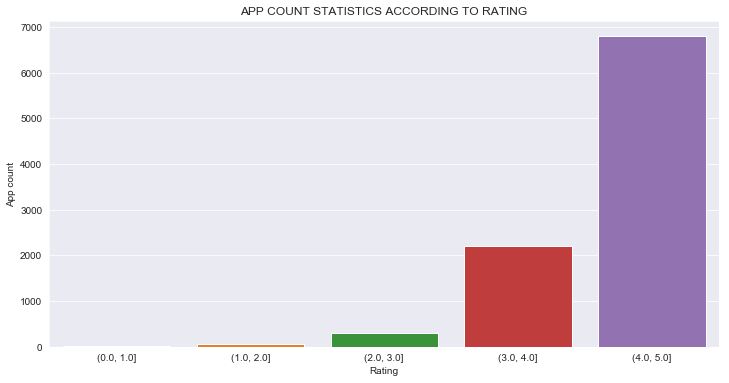

In [39]:
plt.figure(figsize=(12, 6))
axis=sns.barplot('Rating','App',data=rating_df);
axis.set(ylabel= "App count",title='APP COUNT STATISTICS ACCORDING TO RATING');

We can see that most of the apps are with rating 4 and above  and very less apps have rating below 2.

## Top5 Apps with highest review count 

In this we are retrieving the top5 apps with more number of reviews and seeing it visually how their review count is changing.

In [41]:
reviews_df=df.sort_values('Reviews').tail(15).drop_duplicates(subset='App')[['App','Reviews','Rating']]
reviews_df

,App,Reviews,Rating
1704,Clash of Clans,44891723,4.6
335,Messenger – Text and Video Chat for Free,56642847,4.0
3909,Instagram,66509917,4.5
3904,WhatsApp Messenger,69109672,4.4
3943,Facebook,78128208,4.1


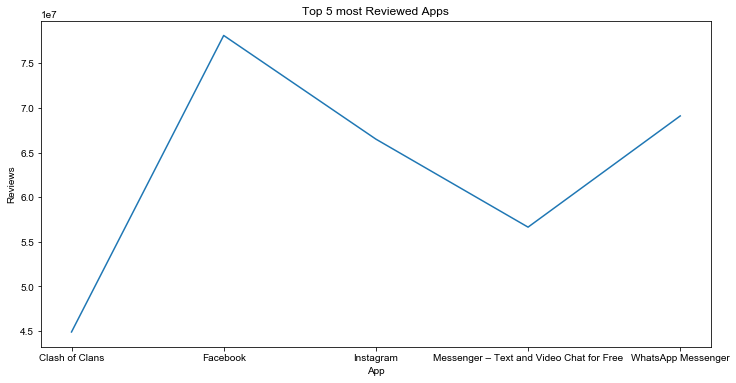

In [16]:
plt.figure(figsize=(12, 6))
axis=sns.lineplot(x="App",y="Reviews",data=reviews_df)
axis.set(title="Top 5 most Reviewed Apps");
sns.set_style('darkgrid')

Facebook has more reviews compared to other apps in the playstore

## Which content type Apps are more in playstore

In this we are grouping the apps according to their content type and visually observing the result

In [17]:
content_df=pd.DataFrame(df.groupby('Content Rating')['App'].count())
content_df.reset_index(inplace=True)
content_df

,Content Rating,App
0,Adults only 18+,3
1,Everyone,8714
2,Everyone 10+,414
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


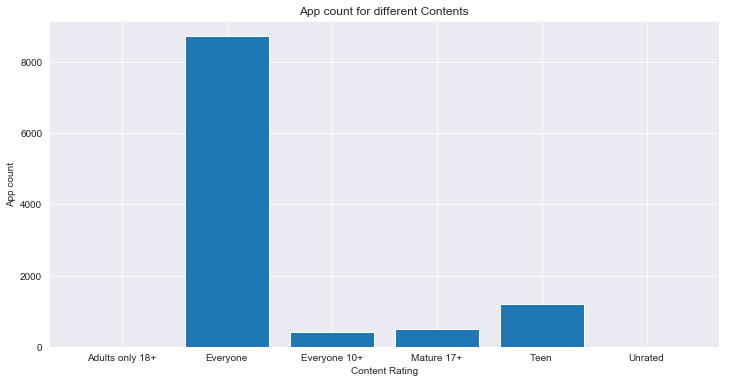

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(content_df['Content Rating'],content_df['App']);
plt.xlabel('Content Rating')
plt.ylabel('App count')
plt.title('App count for different Contents');

Most of the apps in playstore can be used by everyone irrespective of the age.Only 3 apps are A rated

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Free vs Paid Apps

Let's see variations considering type of App ie paid and free apps

In [70]:
Type_df=df.groupby('Type')[['App']].count()
Type_df['Rating']=df.groupby('Type')['Rating'].mean()


In [71]:
Type_df.reset_index(inplace=True)
Type_df

,Type,App,Rating
0,Free,10039,4.186203
1,Paid,800,4.266615


We found the number of apps that are freely available and their average rating and also number of paid apps and their average rating.

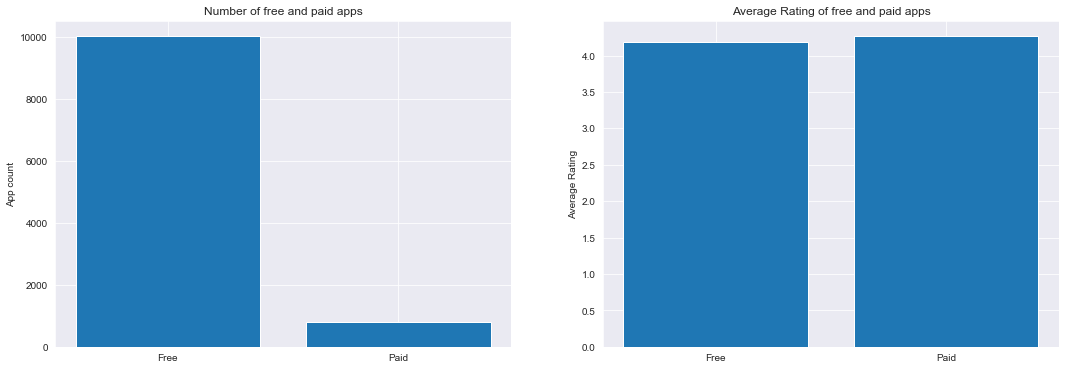

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].bar(Type_df.Type,Type_df.App)
axes[0].set_title("Number of free and paid apps")
axes[0].set_ylabel('App count')
axes[1].bar(Type_df.Type,Type_df.Rating)
axes[1].set_title('Average Rating of free and paid apps')
axes[1].set_ylabel('Average Rating');

#### Conclusion

Average rating of Paid Apps is more than Free apps.So,we can say that paid apps are trust worthy and we can invest in them

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Max Installs

In this we are finding the apps with more number of installs and as we dont have exact count of installs we got around 20 apps with 1B+ downloads
From the 20 apps we will see some analysis of what types are more installed

In [19]:
max_installs=df.loc[df['Installs']==df.Installs.max()][['App','Category','Reviews','Rating','Installs','Content Rating']]

In [20]:
max_installs=max_installs.drop_duplicates(subset='App')
max_installs

,App,Category,Reviews,Rating,Installs,Content Rating
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,3.9,1000000000,Teen
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,4.0,1000000000,Everyone
336,WhatsApp Messenger,COMMUNICATION,69119316,4.4,1000000000,Everyone
338,Google Chrome: Fast & Secure,COMMUNICATION,9642995,4.3,1000000000,Everyone
340,Gmail,COMMUNICATION,4604324,4.3,1000000000,Everyone
341,Hangouts,COMMUNICATION,3419249,4.0,1000000000,Everyone
391,Skype - free IM & video calls,COMMUNICATION,10484169,4.1,1000000000,Everyone
865,Google Play Games,ENTERTAINMENT,7165362,4.3,1000000000,Teen
1654,Subway Surfers,GAME,27722264,4.5,1000000000,Everyone 10+
2544,Facebook,SOCIAL,78158306,4.1,1000000000,Teen


These are the 20 apps which are with 1B+ downloads

### Which App has more rating and trend of 20 apps rating

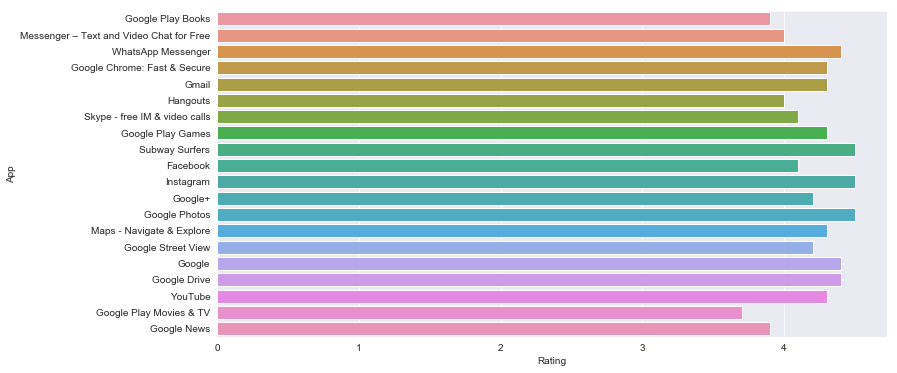

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot('Rating','App',data=max_installs);

We can see that Google photos,Instagram and Subway Surfers are the most rated Apps which have 1B+ downloads.
Though the Apps are used by 1B+ users they have a good rating too

### Which content Apps are most Installed

We will group the most installed apps according to their content and see which content apps are most installed

In [22]:
content_max_df=pd.DataFrame(max_installs.groupby('Content Rating')['App'].count())
content_max_df.reset_index(inplace=True)
content_max_df

,Content Rating,App
0,Everyone,11
1,Everyone 10+,1
2,Teen,8


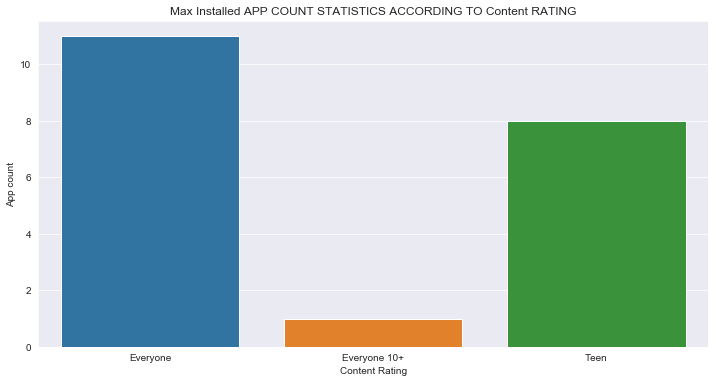

In [24]:
plt.figure(figsize=(12, 6))
axis=sns.barplot('Content Rating','App',data=content_max_df);
axis.set(ylabel= "App count",title='Max Installed APP COUNT STATISTICS ACCORDING TO Content RATING');

More than 10 apps are of type which can be used by any age group and about 8 apps are teen aged apps.Only 1 app is to used by person with age 10+

### Which category Apps are more Installed

In this we will group the most installed apps according to their category and see which category are on high demand

In [25]:
category_max_df=pd.DataFrame(max_installs.groupby('Category')['App'].count())
category_max_df.reset_index(inplace=True)
category_max_df

,Category,App
0,BOOKS_AND_REFERENCE,1
1,COMMUNICATION,6
2,ENTERTAINMENT,1
3,GAME,1
4,NEWS_AND_MAGAZINES,1
5,PHOTOGRAPHY,1
6,PRODUCTIVITY,1
7,SOCIAL,3
8,TOOLS,1
9,TRAVEL_AND_LOCAL,2


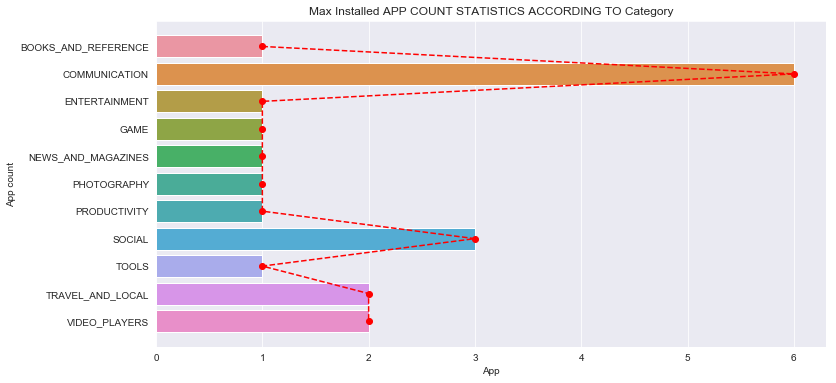

In [26]:
plt.figure(figsize=(12, 6))
axis=sns.barplot('App','Category',data=category_max_df);
plt.plot(category_max_df.App,category_max_df.Category,'o--r')
axis.set(ylabel= "App count",title='Max Installed APP COUNT STATISTICS ACCORDING TO Category');

Communication Apps are mostly installed by people like facebook,whatsapp,instagram..and then social apps are in demand.

#### Conclusion

The most installed apps ie apps with downloads more than 1 Billion are mostly Communication related apps and can be used by any age group without any restriction and also have high user rating.

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Final Conclusion

This analysis is mostly based on the existing data in the dataset , how one parameter is changing with respect to another parameter,whether paid apps are trust worthy and intrests of people towards some particular categories. 

This analysis can further be extended to predict the number of installs and ratings would be if a new app is launched by some Machine Learning algortihms and models.


##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### THANK YOU :) 